In [16]:
#Import Necessary Libraries
import string
from collections import Counter
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import torch
import torch.nn as nn
import torchtext
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# torch.cuda.is_available()

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Moayad/Symptom2Disease.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [18]:
!pip install nltk
import nltk
nltk.download('stopwords')
# set of English stopwords we will remove from our text data
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def clean_text(sent):
    #remove punctuations
    sent = sent.translate(str.maketrans('','',string.punctuation)).strip()

    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sent)
    words = [word for word in words if word not in stop_words]

    return " ".join(words).lower()

In [20]:
nltk.download('punkt')
df["text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
diseases = df["label"].unique()

# helper dictionaries to convert diseases to index and vice versa
idx2dis = {k:v for k,v in enumerate(diseases)}
dis2idx = {v:k for k,v in idx2dis.items()}

In [22]:

df["label"] = df["label"].apply(lambda x: dis2idx[x])

In [23]:
df.head()

,label,text
0,0,i experiencing skin rash arms legs torso past ...
1,0,my skin peeling especially knees elbows scalp ...
2,0,i experiencing joint pain fingers wrists knees...
3,0,there silver like dusting skin especially lowe...
4,0,my nails small dents pits often feel inflammat...


In [24]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in df.text]

In [25]:
# Lower Case
def lower_token(tokens):
    return [w.lower() for w in tokens]

lower_tokens = [lower_token(token) for token in tokens]

In [26]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token]

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in lower_tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [27]:
# Removing Stopwords
stoplist = stopwords.words('english')

In [28]:
def removeStopWords(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lemmatized_tokens]
df['Text_Final'] = [' '.join(sen) for sen in filtered_words]
df['tokens'] = filtered_words

In [29]:
df.head()

,label,text,Text_Final,tokens
0,0,i experiencing skin rash arms legs torso past ...,experiencing skin rash arm leg torso past week...,"[experiencing, skin, rash, arm, leg, torso, pa..."
1,0,my skin peeling especially knees elbows scalp ...,skin peeling especially knee elbow scalp peeli...,"[skin, peeling, especially, knee, elbow, scalp..."
2,0,i experiencing joint pain fingers wrists knees...,experiencing joint pain finger wrist knee pain...,"[experiencing, joint, pain, finger, wrist, kne..."
3,0,there silver like dusting skin especially lowe...,silver like dusting skin especially lower back...,"[silver, like, dusting, skin, especially, lowe..."
4,0,my nails small dents pits often feel inflammat...,nail small dent pit often feel inflammatory te...,"[nail, small, dent, pit, often, feel, inflamma..."


In [30]:
# Initialize lists for each label from '0' to '23'
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
nine = []
ten = []
eleven = []
twelve = []
thirteen = []
fourteen = []
fifteen = []
sixteen = []
seventeen = []
eighteen = []
nineteen = []
twenty = []
twentyone = []
twentytwo = []
twentythree = []

# Loop through each label and append the appropriate values
for l in df.label:
    zero.append(1 if l == 0 else 0)
    one.append(1 if l == 1 else 0)
    two.append(1 if l == 2 else 0)
    three.append(1 if l == 3 else 0)
    four.append(1 if l == 4 else 0)
    five.append(1 if l == 5 else 0)
    six.append(1 if l == 6 else 0)
    seven.append(1 if l == 7 else 0)
    eight.append(1 if l == 8 else 0)
    nine.append(1 if l == 9 else 0)
    ten.append(1 if l == 10 else 0)
    eleven.append(1 if l == 11 else 0)
    twelve.append(1 if l == 12 else 0)
    thirteen.append(1 if l == 13 else 0)
    fourteen.append(1 if l == 14 else 0)
    fifteen.append(1 if l == 15 else 0)
    sixteen.append(1 if l == 16 else 0)
    seventeen.append(1 if l == 17 else 0)
    eighteen.append(1 if l == 18 else 0)
    nineteen.append(1 if l == 19 else 0)
    twenty.append(1 if l == 20 else 0)
    twentyone.append(1 if l == 21 else 0)
    twentytwo.append(1 if l == 22 else 0)
    twentythree.append(1 if l == 23 else 0)

# Add the new columns to the dataframe
df['0'] = zero
df['1'] = one
df['2'] = two
df['3'] = three
df['4'] = four
df['5'] = five
df['6'] = six
df['7'] = seven
df['8'] = eight
df['9'] = nine
df['10'] = ten
df['11'] = eleven
df['12'] = twelve
df['13'] = thirteen
df['14'] = fourteen
df['15'] = fifteen
df['16'] = sixteen
df['17'] = seventeen
df['18'] = eighteen
df['19'] = nineteen
df['20'] = twenty
df['21'] = twentyone
df['22'] = twentytwo
df['23'] = twentythree

# Select the columns in the desired order
data = df[['Text_Final', 'tokens', 'label', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']]


In [31]:
data.head(200)

,Text_Final,tokens,label,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,experiencing skin rash arm leg torso past week...,"[experiencing, skin, rash, arm, leg, torso, pa...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,skin peeling especially knee elbow scalp peeli...,"[skin, peeling, especially, knee, elbow, scalp...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,experiencing joint pain finger wrist knee pain...,"[experiencing, joint, pain, finger, wrist, kne...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,silver like dusting skin especially lower back...,"[silver, like, dusting, skin, especially, lowe...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nail small dent pit often feel inflammatory te...,"[nail, small, dent, pit, often, feel, inflamma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,feel tired every day red spot arm back itch to...,"[feel, tired, every, day, red, spot, arm, back...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,high fever swollen lymph node headache causing...,"[high, fever, swollen, lymph, node, headache, ...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,high fever red spot rash body feel exhausted c...,"[high, fever, red, spot, rash, body, feel, exh...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,seen rash arm neck itch scratch ive also high ...,"[seen, rash, arm, neck, itch, scratch, ive, al...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
category_id = []
for l in data.label:

    if l == 0:
        category_id.append('0')
    elif l == 1:
        category_id.append('1')
    elif l == 2:
        category_id.append('2')
    elif l == 3:
        category_id.append('3')
    elif l == 4:
        category_id.append('4')
    elif l == 5:
        category_id.append('5')
    elif l == 6:
        category_id.append('6')
    elif l == 7:
        category_id.append('7')
    elif l == 8:
        category_id.append('8')
    elif l == 9:
        category_id.append('9')
    elif l == 10:
        category_id.append('10')
    elif l == 11:
        category_id.append('11')
    elif l == 12:
        category_id.append('12')
    elif l == 13:
        category_id.append('13')
    elif l == 14:
        category_id.append('14')
    elif l == 15:
        category_id.append('15')
    elif l == 16:
        category_id.append('16')
    elif l == 17:
        category_id.append('17')
    elif l == 18:
        category_id.append('18')
    elif l == 19:
        category_id.append('19')
    elif l == 20:
        category_id.append('20')
    elif l == 21:
        category_id.append('21')
    elif l == 22:
        category_id.append('22')
    elif l == 23:
        category_id.append('23')

data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'label', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Category_id']]
data.head(200)


# # Initialize the category_id list
# category_id = []

# # Populate the category_id list
# for l in data.label:
#     category_id.append(str(l))

# # Add the new column to the dataframe
# data['Category_id'] = category_id

# # Reorder columns in the dataframe
# columns_order = ['Text_Final', 'tokens', 'label'] + [str(i) for i in range(24)] + ['Category_id']
# data = data[columns_order]

# # Display the first 9 rows of the dataframe
# data.head(500)


,Text_Final,tokens,label,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,Category_id
0,experiencing skin rash arm leg torso past week...,"[experiencing, skin, rash, arm, leg, torso, pa...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,skin peeling especially knee elbow scalp peeli...,"[skin, peeling, especially, knee, elbow, scalp...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,experiencing joint pain finger wrist knee pain...,"[experiencing, joint, pain, finger, wrist, kne...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,silver like dusting skin especially lower back...,"[silver, like, dusting, skin, especially, lowe...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nail small dent pit often feel inflammatory te...,"[nail, small, dent, pit, often, feel, inflamma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,feel tired every day red spot arm back itch to...,"[feel, tired, every, day, red, spot, arm, back...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
196,high fever swollen lymph node headache causing...,"[high, fever, swollen, lymph, node, headache, ...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
197,high fever red spot rash body feel exhausted c...,"[high, fever, red, spot, rash, body, feel, exh...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
198,seen rash arm neck itch scratch ive also high ...,"[seen, rash, arm, neck, itch, scratch, ive, al...",3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [33]:
from io import StringIO
category_id_df = data[['label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'label']].values)

In [34]:
data.shape

(1200, 28)

In [35]:
data_train, data_test = train_test_split(data, test_size=0.20, random_state=42)

In [36]:
# # total training words
totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

# # Storing Length of the training sentence
lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

# # training Vocabulary size
trainingVocabSize = sorted(list(set(totalTrainingWords)))

## Total number of lines
linesCount = len(data_train["tokens"])

In [37]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-08-11 10:35:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-11 10:35:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-11 10:35:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [38]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [39]:
!ls
!pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [40]:
# Convert Glove file to word2vec format (examples: uses 300 dimensions since it's faster)
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/glove.6B.300d.txt'  # I unzipped in glove.6B subdirectory
word2vec_output_file = '/content/glove.6B.300d.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-40-a1aa66304075>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

In [41]:
# Use the converted Glove file
import gensim
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
filename = '/content/glove.6B.300d.word2vec'
word2vec = KeyedVectors.load_word2vec_format(filename, binary=False)

In [42]:
word2vec

In [43]:
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 300

In [44]:
from keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [45]:
tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 1281 unique tokens.


In [46]:
cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [47]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(1282, 300)


In [48]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)

In [49]:
### Define CNN

In [50]:
data_train

,Text_Final,tokens,label,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,Category_id
331,ive quite itchy recently rashy patch skin also...,"[ive, quite, itchy, recently, rashy, patch, sk...",6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
409,really high fever im trouble breathing im swea...,"[really, high, fever, im, trouble, breathing, ...",8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
76,standing walking long period time causing lot ...,"[standing, walking, long, period, time, causin...",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
868,ive experiencing severe itching chill vomiting...,"[ive, experiencing, severe, itching, chill, vo...",17,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,17
138,time feel fatigued dont want eat anything get ...,"[time, feel, fatigued, dont, want, eat, anythi...",2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,occasionally trouble swallowing food tingling ...,"[occasionally, trouble, swallowing, food, ting...",20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,20
1095,headache migraine difficulty sleeping ive shak...,"[headache, migraine, difficulty, sleeping, ive...",21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,21
1130,occasion throughout day night burning upper ab...,"[occasion, throughout, day, night, burning, up...",22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22
860,ive experiencing severe body itchiness along c...,"[ive, experiencing, severe, body, itchiness, a...",17,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,17


In [51]:
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

In [52]:
from tensorflow.keras.layers import LSTM

def LSTMNeuralNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):

    # Embedding layer
    embedding_layer = Embedding(num_words,
                                embedding_dim,
                                weights=[embeddings],
                                input_length=max_sequence_length,
                                trainable=False)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # LSTM layer
    x = LSTM(128, return_sequences=True)(embedded_sequences)
    x = LSTM(128)(x)

    # Fully connected layers
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Output layer with softmax activation for multi-class classification
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-3),
                  metrics=['accuracy'])

    return model


In [53]:
print(data_train.columns)

Index(['Text_Final', 'tokens', 'label', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', 'Category_id'],
      dtype='object')


In [54]:
# Splitting train data into X_train and y_train
y_train = data_train[label_names].values
x_train = cnnTrainData
y_tr = y_train

In [55]:
# Splitting train data into X_test and y_test
y_test = data_test[label_names].values
x_test = cnnTestData
y_tst = y_test

In [56]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, Conv2D, GlobalMaxPooling2D

In [58]:
from tensorflow.keras import optimizers

model = LSTMNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index) + 1, EMBEDDING_DIM, len(list(label_names)))

In [59]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 150, 300)            │         384,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 150, 128)            │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755,440 (2.88 MB)

 Trainable params: 370,840 (1.41 MB)

 Non-trainable params: 384,600 (1.47 MB)

In [60]:
num_epochs = 10
batch_size = 32

In [61]:
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 30s 908ms/step - accuracy: 0.1353 - loss: 2.9913 - val_accuracy: 0.4271 - val_loss: 1.9059
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 838ms/step - accuracy: 0.5303 - loss: 1.6307 - val_accuracy: 0.6875 - val_loss: 1.0349
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 704ms/step - accuracy: 0.7441 - loss: 0.9523 - val_accuracy: 0.7604 - val_loss: 0.6977
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 757ms/step - accuracy: 0.8249 - loss: 0.6278 - val_accuracy: 0.8333 - val_loss: 0.5295
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 675ms/step - accuracy: 0.9029 - loss: 0.3740 - val_accuracy: 0.8333 - val_loss: 0.5874
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 851ms/step - accuracy: 0.9097 - loss: 0.3492 - val_accuracy: 0.8854 - val_loss: 0.3607
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 898ms/step - accuracy: 0.9707 - loss: 0.1471 - val_accuracy: 0.9062 - val_loss: 0.4001
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 877ms/step - accuracy: 0.9469 - loss: 0.1850 - val_accu

In [62]:
# evaluate on test data
results = model.evaluate(x_test, y_tst)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.9293 - loss: 0.3246


In [63]:
# predict model
predictions = model.predict(cnnTestData, batch_size=1024, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [64]:
def makeprediction(texts):
    tk = Tokenizer()
    tk.fit_on_texts(texts)
    index_list = tk.texts_to_sequences(texts)
    x_train = pad_sequences(index_list, maxlen=150)
    pred = model.predict(x_train)
    result = label_names[np.argmax(pred)]
    return result

In [65]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(label_names[np.argmax(p)])

In [66]:
# sum(data_test.label==prediction_labels)/len(prediction_labels)
import numpy as np

# Ensure data_test.label is a list or array of strings
true_labels = list(data_test.label)

# Convert true_labels to strings if they are not already
true_labels = [str(label) for label in true_labels]

# Compare element-wise and sum the boolean array
accuracy = sum(np.array(true_labels) == np.array(prediction_labels)) / len(prediction_labels)

print("Accuracy:", accuracy)


Accuracy: 0.9


In [67]:
data_test.label.value_counts()

,count
label,
6,13
1,12
19,12
3,12
5,12
7,12
18,11
20,11
8,11


In [68]:
# figures visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

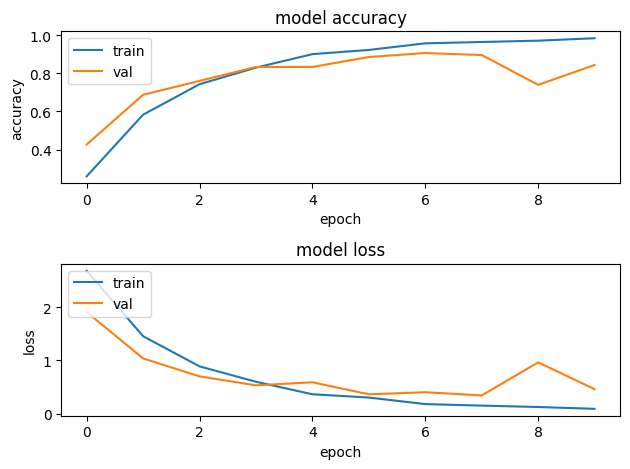

In [69]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
# calc accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [80]:
data_test_labels = np.array(data_test.label).astype(str)
prediction_labels = np.array(prediction_labels).astype(str)
results = confusion_matrix(data_test_labels, prediction_labels)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(data_test_labels, prediction_labels))
print ('Report : ')
print (classification_report(data_test_labels, prediction_labels))

Confusion Matrix :
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  